In [46]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

In [19]:
merged_data = pd.read_csv('data/merged_data.csv')

In [20]:
merged_data.head()

,Unnamed: 0,subreddit,text
0,0,AnimalCrossing,FANG IS A FUCKING SAVAGE
1,1,AnimalCrossing,It was an easy day of fossil hunting for my Fi...
2,2,AnimalCrossing,I like tybalt didn't at first but he's cool I'...
3,3,AnimalCrossing,Finally did my bathroom after 4 months!
4,4,AnimalCrossing,If you place a chair or bed and quickly take p...


In [21]:
merged_data.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [22]:
X = merged_data['text']
y = merged_data['subreddit']

In [23]:
# From lesson 5.04, check what we need to check in a classification problem.
y.value_counts(normalize = True)

AnimalCrossing    0.501253
acturnips         0.498747
Name: subreddit, dtype: float64

In [24]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    stratify=y, 
                                                    random_state=17)

In [25]:
# instantiate a CountVectorizer
cvec = CountVectorizer(stop_words='english')

In [26]:
#fit the vectorizer on X_train
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [27]:
#From lesson 5.04, transform X_train
X_train = cvec.transform(X_train)

In [28]:
#From lesson 5.04, convert X_train to a dataframe
X_train_df = pd.DataFrame(X_train.toarray(),
                         columns=cvec.get_feature_names())
X_train_df

,000,0567,05am,0601,0820,10,100,10000,100k,102,...,ziddnlf92gj51,zigzag,zigzagoons,zodiac,zoom,zucker,zuppa,zwei,ಠ_ಠ,⑤⑤②
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Repeat on the test dataset
X_test = cvec.transform(X_test)
X_test_df = pd.DataFrame(X_test.toarray(),
                         columns=cvec.get_feature_names())

X_test_df.head()

,000,0567,05am,0601,0820,10,100,10000,100k,102,...,ziddnlf92gj51,zigzag,zigzagoons,zodiac,zoom,zucker,zuppa,zwei,ಠ_ಠ,⑤⑤②
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#From lesson 5.04
# get count of top-occurring words

# empty dictionary
top_words = {}

# loop through columns
for i in X_train_df.columns:
    # save sum of each column in dictionary
    top_words[i] =  X_train_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [55]:
#Check that most frequent words are relevent- they are.
most_freq.head()

,0,1
0,removed,335
1,sw,331
2,buying,270
3,selling,246
4,island,206


In [33]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_df)
X_test_sc = ss.fit_transform(X_test_df)

In [35]:
knn = KNeighborsClassifier()

In [36]:
cross_val_score(knn, X_train_sc, y_train, cv=10).mean()

0.9098109243697479

In [37]:
knn.fit(X_train_sc, y_train)
knn.score(X_train_sc, y_train)

0.9598997493734336

In [38]:
knn.score(X_test_sc, y_test)

0.8984962406015038

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


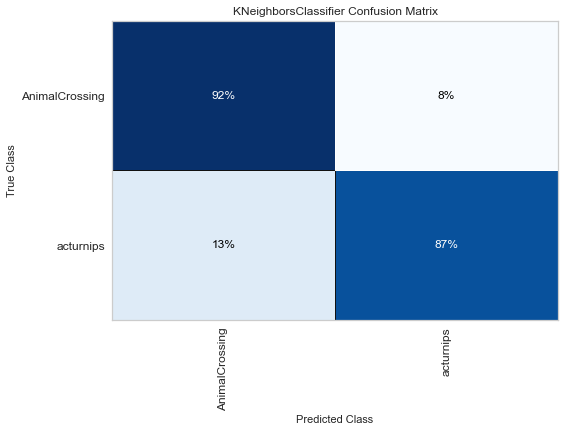

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [56]:
#From yellowbrick documentation

cm = ConfusionMatrix(knn, classes=['AnimalCrossing', 'acturnips'], percent=True, cmap= 'Blues')

cm.fit(X_train_sc, y_train)
cm.score(X_test_sc, y_test)

cm.show()